In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# MiniBatch Kmeans


In [2]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.cluster import Birch
from sklearn.datasets import make_blobs
from sklearn.metrics import v_measure_score

In [3]:
from time import time

def cluster_and_time(clusterer, data, labels):
    ''' Clusters the data (with known labels) using clusterer. 
    Returns a v score of clustering and the time it took to cluster the data.
    '''
    t0 = time()
    clusterer.fit(data)
    t1 = time()
    t = t1-t0
    v = v_measure_score(labels, clusterer.labels_)
    return v, t

In [11]:
N_CLUSTERS = 500
data, labels = make_blobs(500000, centers= N_CLUSTERS, cluster_std = 4, center_box = [0,1000], random_state = 0, shuffle = True)

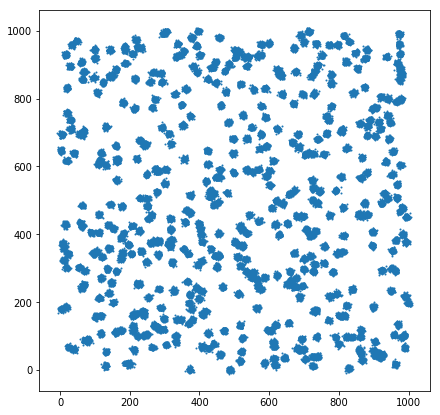

In [7]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1], s = 1)
plt.show()

In [8]:
batches = np.array([1000,10000, 50000])

print('MiniBatch K Means comparison')
print('\n')

for batch_size in batches:
    v,t = cluster_and_time(MiniBatchKMeans(n_clusters=500, batch_size= batch_size), data, labels)
    print("Batch size: {}".format(batch_size))
    print('V score: {}'.format(v))
    print('Time in seconds: {}'.format(t))
    print('\n')

MiniBatch K Means comparison


Batch size: 1000
V score: 0.9745127060119282
Time in seconds: 4.3462677001953125


Batch size: 10000
V score: 0.9758348446401952
Time in seconds: 7.573040246963501


Batch size: 50000
V score: 0.9759096727669139
Time in seconds: 24.85307216644287




In [12]:
algos = [KMeans(500, n_init=1), Birch(4, n_clusters = 500, branching_factor = 1000),
         Birch(threshold=4, n_clusters= KMeans(n_clusters=500, n_init=1), branching_factor=1000),
         MiniBatchKMeans(500, batch_size= 1000),  
         MiniBatchKMeans(500, batch_size= 1000, init_size = 100000)
        ]

In [13]:
print('Algorithm comparison')
for algo in algos:
    v,t = cluster_and_time(algo, data, labels)
    print(algo)
    print('V score: {}'.format(v))
    print('Time in seconds: {}'.format(t))
    print('\n')

Algorithm comparison
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=500, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
V score: 0.975082770892823
Time in seconds: 90.32551980018616


Birch(branching_factor=1000, compute_labels=True, copy=True, n_clusters=500,
   threshold=4)
V score: 0.9749984796574863
Time in seconds: 33.69734716415405


Birch(branching_factor=1000, compute_labels=True, copy=True,
   n_clusters=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=500, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0),
   threshold=4)
V score: 0.9715241401535275
Time in seconds: 32.979392766952515


MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10,
        n_clusters=500, n_init=3, random_state=None,
        reassignment_ratio=0.01, tol=0.0, v